# Chronicling America API in Python

By Avery Fernandez and Jay Crawford

The Chronicling America API provides programmatic access to a vast collection of historic American newspapers, enabling researchers and developers to search, retrieve, and analyze digitized newspaper pages and metadata from the Library of Congress.

Please see the following resources for more information on API usage:

- Documentation
  - <a href="https://chroniclingamerica.loc.gov/about/api/" target="_blank">Chronicling America API Documentation</a>
  - <a href="https://www.loc.gov/apis/additional-apis/chronicling-america-api/" target="_blank">Library of Congress APIs for LoC.gov</a>
- Terms
  - <a href="https://chroniclingamerica.loc.gov/about/api/" target="_blank">Chronicling America Terms of Use</a>
- Data Reuse
  - <a href="https://chroniclingamerica.loc.gov/about/api/" target="_blank">Chronicling America Data Reuse Policy</a>

*These recipe examples were tested on May 7, 2025.* 

> **Attribution:** We thank ***Professor Jessica Kincaid*** (UA Libraries, Hoole Special Collections) for the use-cases. All data was collected from the Library of Congress, Chronicling America: Historic American Newspapers site, using the API.

> Note that the data from the Alabama state intelligencer, The age-herald, and the Birmingham age-herald were contributed to Chronicling America by The University of Alabama Libraries: <a href="https://chroniclingamerica.loc.gov/awardees/au/" target="_blank">https://chroniclingamerica.loc.gov/awardees/au/</a>

## Setup

The following external libraries need to be installed into your enviornment to run the code examples in this tutorial:

* <a href="https://github.com/psf/requests" target="_blank">requests</a>
* <a href="https://github.com/ipython/ipykernel" target="_blank">ipykernel</a>
* <a href="https://github.com/matplotlib/matplotlib" target="_blank">matplotlib</a>

We import the libraries used in this tutorial below:

In [1]:
import requests
import matplotlib.pyplot as plt
from pprint import pprint
import re

## 1. Retrive a Record from its LCCN

The Chronicling America API identifies newspapers and other records using LCCNs. We can query the API once we have the LCCN for the newspaper and even ask for particular issues and editions. For example, the following link lists newspapers published in the state of Alabama, from which the LCCN can be obtained: <a href="https://chroniclingamerica.loc.gov/newspapers/?state=Alabama" target="_blank">Chronicling America: Alabama Newspapers</a>.

Here is an example with the Alabama State Intelligencer:

In [2]:
BASE_URL = "https://chroniclingamerica.loc.gov"
endpoint = "lccn"
lccn = "sn84021903"

try:
    response = requests.get(f"{BASE_URL}/{endpoint}/{lccn}.json")
    # Raise an error for bad responses
    response.raise_for_status() 
    data = response.json()
    pprint(data, depth=1)
except requests.exceptions.RequestException as e:
    print(f"An error occurred: {e}")
    data = None

{'end_year': '183?',
 'issues': [...],
 'lccn': 'sn84021903',
 'name': 'Alabama state intelligencer. [volume]',
 'place': [...],
 'place_of_publication': 'Tuscaloosa, Ala.',
 'publisher': "M'Guire, Henry & M'Guire",
 'start_year': '1829',
 'subject': [...],
 'url': 'https://chroniclingamerica.loc.gov/lccn/sn84021903.json'}


Indexing into the json output allows data to be extracted using key names as demonstrated below:

In [3]:
if data:
    pprint(data["name"])

'Alabama state intelligencer. [volume]'


In [4]:
if data:
    pprint(data["publisher"])

"M'Guire, Henry & M'Guire"


Moving on to another publication, we can get the 4th page (seq-4) of the The Ocala evening star newspaper published on July 29th, 1897.

In [5]:
endpoint = "lccn"
lccn = "sn84027621"
date = "1897-07-29"
edition = "ed-1"
page = "seq-4"

try:
    response = requests.get(f"{BASE_URL}/{endpoint}/{lccn}/{date}/{edition}/{page}.json")
    # Raise an error for bad responses
    response.raise_for_status() 
    data = response.json()
    pprint(data, depth=1)
except requests.exceptions.RequestException as e:
    print(f"An error occurred: {e}")
    data = None

{'issue': {...},
 'jp2': 'https://chroniclingamerica.loc.gov/lccn/sn84027621/1897-07-29/ed-1/seq-4.jp2',
 'ocr': 'https://chroniclingamerica.loc.gov/lccn/sn84027621/1897-07-29/ed-1/seq-4/ocr.xml',
 'pdf': 'https://chroniclingamerica.loc.gov/lccn/sn84027621/1897-07-29/ed-1/seq-4.pdf',
 'sequence': 4,
 'text': 'https://chroniclingamerica.loc.gov/lccn/sn84027621/1897-07-29/ed-1/seq-4/ocr.txt',
 'title': {...}}


In [6]:
# Download and save the PDF
if data:
    # Get the PDF URL from the JSON response
    pdf_url = data['pdf'] 
    # Download the PDF file
    try:
        pdf_response = requests.get(pdf_url, allow_redirects=True)
        # Save the PDF file to disk
        with open(f"{lccn}_{date}_{edition}_{page}.pdf", 'wb') as pdf_file:
            pdf_file.write(pdf_response.content)
    except requests.exceptions.RequestException as e:
        print(f"An error occurred while downloading the PDF: {e}")

## 2. Frequency of “University of Alabama” Mentions

The URL below limits to searching newspapers in the state of Alabama and provides 500 results of “University of Alabama” mentions. Note that phrases can be searched by putting them inside parentheses for the query.

In [9]:
endpoint = "search/pages/results"
params = {
    "state": "Alabama",
    "proxtext": "(University of Alabama)",
    "rows": 500,
    "format": "json"
}

try:
    response = requests.get(f"{BASE_URL}/{endpoint}", params=params)
    # Raise an error for bad responses
    response.raise_for_status() 
    data = response.json()
    pprint(data["items"][0], depth=1)
except requests.exceptions.RequestException as e:
    print(f"An error occurred: {e}")
    data = None

{'alt_title': [...],
 'batch': 'au_foster_ver01',
 'city': [...],
 'country': 'Alabama',
 'county': [...],
 'date': '19240713',
 'edition': None,
 'edition_label': '',
 'end_year': 1950,
 'frequency': 'Daily',
 'id': '/lccn/sn85038485/1924-07-13/ed-1/seq-48/',
 'language': [...],
 'lccn': 'sn85038485',
 'note': [...],
 'ocr_eng': 'canes at the University .of Alabama\n'
            'MORGAN HALL -\n'
            'SMITH HALL\n'
            "' hi i ..mil w i 1»..IIgylUjAiU. '. n\n"
            'jjiIi\n'
            '(ARCHITECTS* MODEL)\n'
            'COMER. HALli\n'
            'MINING\n'
            '••tSgSB?\n'
            "* i v' y -4\n"
            "■Si ' 3>\n"
            'A GLIMP9E OF FRATERNITY ROW\n'
            'THE GYMNASIUM\n'
            'Tuscaloosa, Alabama\n'
            'ADV.',
 'page': '8',
 'place': [...],
 'place_of_publication': 'Birmingham, Ala.',
 'publisher': 'Age-Herald Co.',
 'section_label': 'Tuscaloosa Section',
 'sequence': 48,
 'start_year': 1902,
 'state': [..

In [10]:
if data:
    print(len(data["items"]))

500


In [11]:
# Create a list of dates from each item record
dates = []
if data:
    for item in data["items"]:
        dates.append(item["date"])
# Show first 10
pprint(dates[:10]) 

['19240713',
 '19180818',
 '19160716',
 '19240224',
 '19160806',
 '19130618',
 '19110815',
 '19241029',
 '19240217',
 '19150801']


In [ ]:
from datetime import datetime
converted_dates = [datetime.strptime(date, '%Y%m%d') for date in dates]

# Print first 10 dates
converted_dates[0:10]

[datetime.datetime(1924, 7, 13, 0, 0),
 datetime.datetime(1918, 8, 18, 0, 0),
 datetime.datetime(1916, 7, 16, 0, 0),
 datetime.datetime(1924, 2, 24, 0, 0),
 datetime.datetime(1916, 8, 6, 0, 0),
 datetime.datetime(1913, 6, 18, 0, 0),
 datetime.datetime(1911, 8, 15, 0, 0),
 datetime.datetime(1924, 10, 29, 0, 0),
 datetime.datetime(1924, 2, 17, 0, 0),
 datetime.datetime(1915, 8, 1, 0, 0)]

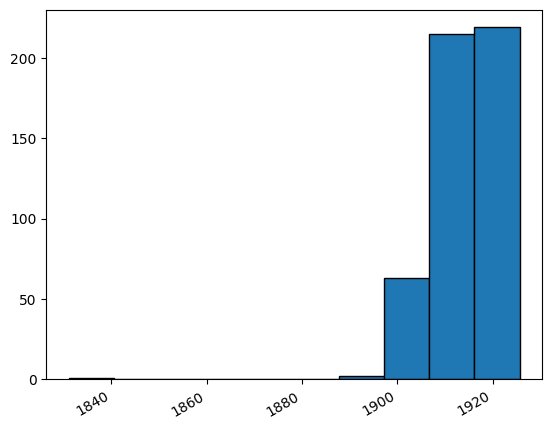

In [14]:
# Plot the number of records and dates
fig, ax = plt.subplots()
plt.hist(converted_dates, bins=10,edgecolor='black')
# Rotates and right-aligns the x labels so they don't crowd each other.
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
plt.show()

## 3. Sunday Comic Titles in the Age-Herald
The Age - Herald published comics every Sunday, we will try to extract the titles of those published on page 15 of the 17th October 1897 edition.

In [15]:
endpoint = "lccn"
lccn = "sn83045462"
date = "1927-06-01"
edition = "ed-1"
page = "seq-14"

try:
    response = requests.get(f"{BASE_URL}/{endpoint}/{lccn}/{date}/{edition}/{page}/ocr.txt")
    # Raise an error for bad responses
    response.raise_for_status() 
    data = response.text
    # Show first 500 characters
    print(data[:500])
except requests.exceptions.RequestException as e:
    print(f"An error occurred: {e}")
    data = None

14
i BUYING CONTINUES
| IN STOCK MARKET
Most Interest Is Taken in
( U. S. Steel TodayâSell
at New Top.
BY GEORKK T. HLGIIES.
Special Dispatch to The Star.
NEW YORK. June 1. âIgnoring: en
tirely the increase in brokersâ loans,
which brought the total up to the
highest of the year, the stock market
started in today with the buying
movement in the favored rails and
industrials showing no signs of a let
up. Time money was a shade firmer,
but call funds renewed at 4% per cent
unchanged, and Wal


In [16]:
if data:
    # Split the OCR text into lines
    for line in data.split("\n"):
        # Replace all non-uppercase letters with spaces
        cleaned_line = re.sub(r"[^A-Z]+", ' ', line)
        
        # Calculate the number of letters and spaces in the cleaned line
        num_spaces = cleaned_line.count(" ")
        num_letters = len(cleaned_line) - num_spaces
        
        # Check if at least 75% of the characters in the line are letters
        if len(cleaned_line) > 0 and (num_letters / len(cleaned_line)) >= 0.75:
            # Print the cleaned line if it meets the criteria
            print(cleaned_line)

 BUYING CONTINUES
 IN STOCK MARKET
BY GEORKK T HLGIIES 
DIVIDEND OMITTED 
FINANCIAL 
I NEW YORK STOCK EXCHANGE 
DROW 
THE EVENING STAR WASHINGTON I C WEDNESDAY JUNE T 
MS PASSM 
PEPCO PREFERRED
AT NEW TOP MARK
BY EDWARD C STONE 
COTTON RECOVERS
AFTER EARLY DROP
POTATOES STRONG 
NEW YORK MARKETS 
RUBBER STEADY 
SHORT TERM SECURITIES 
DIVIDENDS 
NEW YORK MAIN
COMMODITY NEWS
WIRED STAR FROM
ENTIRE COUNTRY
NEW ORLEANS T U 
PORTLAND O O 
I YOUNGSTOWN F 
NOTED BANKER DIES 
DIVIDEND DECLARED 
CITIZENS BANK BUILDING WOODWARD BUILDING
BALTIMORE MD WASHINGTON D C 
JOHN JOY EDSON P WALTER S PRATT J S 
O YEAR COMPLETED
S YSTEMATICALLY 
LINCOLN NATIONAL BANK
THE FRANKLIN NATIONAL BANK
BANK OF COMMERCE AND SAVINGS
SECURITY SAVINGS AND COMMERCIAL BANK 
DISTRICT NATIONAL BANK
AMERICAN SECURITY AND TRUST COMPANY
UNITED STATES SAVINGS BANK
SEVENTH STREET SAVINGS BANK
THE RIGGS NATIONAL BANK
MOUNT VERNON SAVINGS BANK
THE WASHINGTON LOAN AND TRUST COMPANY
FINANCIAL 
CREDIT RENEWED 
WOOL PRICES STEADY 
PRI

## 4. Industrialization Keywords Frequency in the Birmingham Age-Herald
We will try to obtain the frequency of “Iron” on the front pages of the Birmingham Age-Herald newspapers from the year 1900 to 1920. (limited to first 500 rows for testing here)

In [20]:
endpoint = "search/pages/results"
params = {
    # Search for Alabama newspapers
    "state": "Alabama",
    "lccn": "sn85038485",
    # Filter by date range
    # 1900 to 1920
    "dateFilterType": "yearRange",
    "date1": 1900,
    "date2": 1920,
    # Filter by sequence number
    # 1 is the first page of the newspaper
    "sequence": 1,
    # Filter by text "Iron"
    "andtext": "Iron",
    "rows": 500,
    "searchType": "advanced",
    "format": "json"
}

try:
    response = requests.get(f"{BASE_URL}/{endpoint}", params=params)
    # Raise an error for bad responses
    response.raise_for_status() 
    data = response.json()
    pprint(data["items"][0], depth=1)
except requests.exceptions.RequestException as e:
    print(f"An error occurred: {e}")
    data = None

{'alt_title': [...],
 'batch': 'au_flagg_ver01',
 'city': [...],
 'country': 'Alabama',
 'county': [...],
 'date': '19090113',
 'edition': None,
 'edition_label': '',
 'end_year': 1950,
 'frequency': 'Daily',
 'id': '/lccn/sn85038485/1909-01-13/ed-1/seq-1/',
 'language': [...],
 'lccn': 'sn85038485',
 'note': [...],
 'ocr_eng': 'THE BIRMINGHAM AGE-HERALD.\n'
            'VOLUME XXXVIH. , BIRMINGHAM, ALABAMA, WEDNESDAY, JANUARY 13, '
            '1909. 12 PAGES. NUMBER 252\n'
            'REVENUE TARIFF\n'
            'IS UNDERWOOD’S\n'
            'SCHEME ON IRON\n'
            'Alabama Congressman Fires\n'
            'Some Plain Facts on\n'
            '“ tbe Tariff\n'
            'GREAT DEMAND FOR PIG\n'
            'IRON DURING YEAR 190/\n'
            'Congressman Underwood Explains His\n'
            ', Attitude Upon Steel and Iron Sub\n'
            'jects and Compares Cost\n'
            'of Production.\n'
            'Washington, January 12.—(Special.)—\n'
            'Represe

In [23]:
dates = [item["date"] for item in data["items"]]
len(dates)

500

In [24]:
dates[:10]

['19090113',
 '19120123',
 '19170310',
 '19060816',
 '19090626',
 '19050404',
 '19120215',
 '19080108',
 '19060412',
 '19110803']

In [25]:
converted_dates = [datetime.strptime(date, '%Y%m%d') for date in dates]
converted_dates[0:10]

[datetime.datetime(1909, 1, 13, 0, 0),
 datetime.datetime(1912, 1, 23, 0, 0),
 datetime.datetime(1917, 3, 10, 0, 0),
 datetime.datetime(1906, 8, 16, 0, 0),
 datetime.datetime(1909, 6, 26, 0, 0),
 datetime.datetime(1905, 4, 4, 0, 0),
 datetime.datetime(1912, 2, 15, 0, 0),
 datetime.datetime(1908, 1, 8, 0, 0),
 datetime.datetime(1906, 4, 12, 0, 0),
 datetime.datetime(1911, 8, 3, 0, 0)]

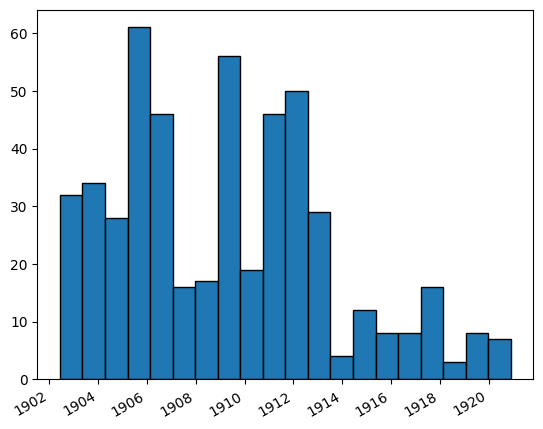

In [26]:
fig, ax = plt.subplots()
plt.hist(converted_dates, bins=20,edgecolor='black')
# fig.set_size_inches(18.5, 10.5)
# Rotate and right-align the x labels so they don't crowd each other
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
plt.show()